<h1><center>𝕸𝖊𝖙𝖆𝖑 𝕭𝖆𝖓𝖉𝖘 🇧​​​​​🇾​​​​​ 🇳​​​​​🇦​​​​​🇹​​​​​🇮​​​​​🇴​​​​​🇳​​​​​</center></h1>
<center>
1964 ~ 2016
<br>
<br>

**Introdução à Ciência dos Dados**

*Professor Luciano Barbosa*<br><br>

**Grupo**<br>
🤘 Arianne Macena [@annemacena](https://github.com/annemacena) - asm7@cin.ufpe.br<br>
🤘 Otávio Kamel [@otaviokamel](https://github.com/otaviokamel) - oackb@cin.ufpe.br
<br><br>
<img src="https://media.giphy.com/media/XcLpNX8NFvhAc/giphy.gif" align="center"></center>

# Visão Geral

Para o presente trabalho, foi escolhido o *dataset* "Metal Bands by Nation" com a finalidade de fazer uma análise de seus dados e aplicar técnicas de ciência de dados pontuadas em aula. O *dataset* possui dados sobre bandas do gênero "**Metal**" ao decorrer dos anos de **1964 até 2016**.

Os dados foram coletados do site [Metal Storm](http://metalstorm.net/). Além de uma lista de bandas de Metal, o site possui diversas informações sobre *reviews* de álbums, concertos e entrevistas.

A coleta de dados foi feita através de *web scraping* do site da Metal Storm e seu resultado foi hospedado no [Kaggle](https://www.kaggle.com/mrpantherson/metal-by-nation).

## Bibliotecas

In [ ]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import HTML

### GeonamesCache

In [ ]:
# Biblioteca que possui todos os nomes de países e continentes de acordo com a ISO
!pip install geonamescache

In [ ]:
from geonamescache import GeonamesCache
from geonamescache.mappers import country

### GeoPandas

In [ ]:
#Descomente essas linhas caso esteja rodando no Google Colab,
#essas libs serão instaladas localmente via conda
!pip install geopandas
!pip install mapclassify

     |████████████████████████████████| 1.0 MB 7.5 MB/s 
     |████████████████████████████████| 6.3 MB 13.6 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


In [ ]:
import geopandas as gpd

## Importação e informações do *dataset*

In [ ]:
# importando arquivo com dados do dataset escolhido
df = pd.read_csv('metal_bands_2017.csv', encoding='latin-1')

As colunas do *dataset* são compostas pelos seguintes dados:

*   **band_name**: Nome da banda.
*   **fans**: A quantidade de fãs a banda possui no site da Metal Storm.
*   **formed**: O ano que a banda foi formada.
*   **origin**: O país de onde a banda é.
*   **split**: O ano que a banda se separou.
*   **style**: O estilo ou subgênero da banda.



In [ ]:
# visualizando as 5 primeiras linhas do dataset
df.head()

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death


In [ ]:
# visualizando a dimensionalidade do dataset (linhas, colunas)
df.shape

(5000, 7)

In [ ]:
# Estatísticas descritivas sobre as colunas numéricas (os tipos de dados ainda não foram tratados)
df.describe()

,Unnamed: 0,fans
count,5000.000000,5000.000000
mean,2499.500000,87.805800
std,1443.520003,296.137523
min,0.000000,0.000000
25%,1249.750000,4.000000
50%,2499.500000,12.000000
75%,3749.250000,42.000000
max,4999.000000,4195.000000


In [ ]:
# Estatísticas descritivas sobre as colunas categóricas
df.describe(include='object')

,band_name,formed,origin,split,style
count,5000,5000,4992,5000,5000
unique,4949,53,113,50,1227
top,Michael Schenker's Temple Of Rock,2005,USA,-,Black
freq,2,270,1139,2215,345


# Pré-Processamento

## Tratamento	de	dados


### Dados faltantes

In [ ]:
# a coluna Unnamed: 0 é apenas repetição do index do dataframe, vamos removê-la
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.head()

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death


In [ ]:
# visualizando quantidade de dados por colunas que possuem dados faltantes
df.isna().sum()

band_name    0
fans         0
formed       0
origin       8
split        0
style        0
dtype: int64

A princípio, apenas a coluna 'origin' possui valores faltantes. Mas ao investigar o dataset mais a frente, veremos que existem alguns valores que foram preenchidos com um traço "-" para indicar a falta daquele atributo.

In [ ]:
# Verificando quais registros possuem dados faltantes
df[df['origin'].isna()]

,band_name,fans,formed,origin,split,style
460,Enshine,175,2009,NaN,-,Gothic doom
989,Clouds,61,2013,NaN,2013,Atmospheric doom
1422,Subterranean Masquerade,35,1997,NaN,-,"Progressive,Psychedelic rock"
2614,Twilight Of The Gods,11,2010,NaN,-,Heavy
2996,Archivist,7,2015,NaN,-,"Atmospheric black,Post-metal"
3444,Metallic Taste Of Blood,5,2011,NaN,-,"Progressive,Instrumental"
3941,Level 10,3,2014,NaN,2014,"Heavy,Power"
4201,Death Penalty,2,2013,NaN,2013,"Doom,Heavy"


In [ ]:
# removendo linhas que possuem ano de origem faltante
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

band_name    0
fans         0
formed       0
origin       0
split        0
style        0
dtype: int64

### Dados duplicados

In [ ]:
# verificando se existem nomes de bandas duplicados
df["band_name"].duplicated().sum()

51

In [ ]:
df.shape

(4992, 6)

In [ ]:
# removendo linhas com nome de banda duplicado
df.drop_duplicates(subset="band_name", keep='first', inplace=True)

In [ ]:
df.shape

(4941, 6)

### Outros tratamentos

##### Removendo bandas sem data de criação

Linhas com o caractere "-" em qualquer coluna indica que aquele dado não está disponível. Na coluna "split" não precisa necessáriamente ser tratado (já que pode indicar que a banda ainda está ativa), mas na coluna "formed" sim, pois não tem a informação de qual ano a banda foi criada.

In [ ]:
df[df['formed'] == '-']

,band_name,fans,formed,origin,split,style
4442,Throes Of Sanity,2,-,USA,-,Us power
4599,Doomocracy,1,-,Greece,-,Doom
4821,Rustless,1,-,Italy,-,Heavy
4948,Weapon UK,1,-,United Kingdom,-,"New wave of british heavy,Heavy"


In [ ]:
indexNaNFormed = df[df['formed'] == '-'].index
indexNaNFormed

Int64Index([4442, 4599, 4821, 4948], dtype='int64')

In [ ]:
# como são poucas linhas, vamos removê-las
df.drop(indexNaNFormed , inplace=True)

In [ ]:
df.shape

(4937, 6)

##### Separando subgêneros

A coluna "*style*" pode conter mais de um subgênero, então vamos dividí-los para que fique melhor a visualização

In [ ]:
generos = df['style'].str.split(',', expand = True)
generos.count()

0    4937
1    2152
2     434
3      80
4      15
5       3
dtype: int64

In [ ]:
df.head()

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death


Como as bandas podem ter até 5 subgêneros, mas nem a metade das bandas possui mais de 1 gênero. Então vamos manter pelo menos um subgênero principal e outro secundário.

In [ ]:
df['main_style'] = generos[0]
df['secondary_style'] = generos[1]

df.head()

,band_name,fans,formed,origin,split,style,main_style,secondary_style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy",New wave of british heavy,Heavy
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive",Extreme progressive,Progressive rock
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash",Heavy,Bay area thrash
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock",Thrash,Heavy
4,Amon Amarth,3054,1988,Sweden,-,Melodic death,Melodic death,None


In [ ]:
df.shape

(4937, 8)

##### Tratando país de origem

Os dados dos países de origem não estão padronizados de acordo com a [ISO 3166-1 alpha-3 ](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3), é necessário tratá-los.

Alguns exemplos de dados não tratados: "Canada, France", "Korean, South", etc. Vamos dividir esse dado e manter apenas o primeiro antes da vírgula.

In [ ]:
df['origin'].value_counts()

USA                1122
Sweden              469
Germany             392
United Kingdom      338
Finland             300
                   ... 
Iran, Norway          1
Andorra               1
Ukraine, Canada       1
Norway, Finland       1
Venezuela             1
Name: origin, Length: 113, dtype: int64

Como estaremos usando uma [biblioteca](https://github.com/yaph/geonamescache) que precisam dos dados dos países (coluna "origin") no padrão ISO, precisamos tratar os valores que não estão conforme este padrão.

In [ ]:
# printa todos os países que não estão no padrão ISO
countries = GeonamesCache().get_countries_by_names()
sorted(set(df.origin.unique()) - set(countries.keys()))

['Australia, United Kingdom',
 'Belgium, United Kingdom',
 'Bosnia and Herzegovina, Croatia',
 'Canada, France',
 'Colombia, USA',
 'Czech Republic',
 'Denmark, USA',
 'Finland, Sweden',
 'Greece, Sweden',
 'Greece, USA',
 'Hungary, United Kingdom',
 'Iran, Norway',
 'Iraq, USA',
 'Israel, Germany',
 'Israel, The Netherlands',
 'Italy, Spain',
 'Korea, South',
 'Kyrgyzstan, Germany',
 'Lithuania, Germany',
 'Lithuania, United Kingdom',
 'Macedonia',
 'Mexico, USA',
 'Norway, Finland',
 'Poland, Sweden',
 'Portugal, United Kingdom',
 'Russia, Canada',
 'Slovak Republic',
 'Swaziland',
 'Sweden, Finland',
 'The Netherlands',
 'Tunisia, France',
 'UAE',
 'USA',
 'USA, Cyprus',
 'Ukraine, Canada',
 'United Kingdom, Greece',
 'United Kingdom, USA']

Esse *dataset* tem um registro em específico com o dado da coluna "origin" igual à "South, Korean". Antes de fazermos o split dos dados da coluna "origin", vamos tratar esse registro individualmente.

In [ ]:
df[df['origin'] == 'Korea, South']

,band_name,fans,formed,origin,split,style,main_style,secondary_style
2094,Jambinai,17,2009,"Korea, South",-,"Folk,Post-metal",Folk,Post-metal


In [ ]:
df.loc[df['origin'] == 'Korea, South', 'origin'] = 'South Korea'

In [ ]:
df[df['origin'].str.contains('Korea')]

,band_name,fans,formed,origin,split,style,main_style,secondary_style
2094,Jambinai,17,2009,South Korea,-,"Folk,Post-metal",Folk,Post-metal


In [ ]:
# obtendo index das bandas que possuem dados da coluna "origin" mal formatados
indexes = []
for index, band in df.iterrows():
    cell_origin = band['origin']
    countries = cell_origin.split(',')
    if (len(countries) > 1):
        indexes.append(index)

In [ ]:
df[df.index.isin(indexes)].head(10)

,band_name,fans,formed,origin,split,style,main_style,secondary_style
129,Motörhead,875,1975,"United Kingdom, USA",1975,Heavy,Heavy,None
147,Ozzy Osbourne,750,1979,"United Kingdom, USA",1979,Heavy,Heavy,None
159,King Diamond,641,1985,"Denmark, USA",1985,Heavy,Heavy,None
194,Mercyful Fate,525,1981,"Denmark, USA",-,"Heavy,First wave of black",Heavy,First wave of black
295,Melechesh,307,1993,"Israel, The Netherlands",1993,"Melodic black,Folk",Melodic black,Folk
319,Myrath,275,2001,"Tunisia, France",2001,"Progressive,Oriental folk",Progressive,Oriental folk
448,Inquisition,184,1988,"Colombia, USA",-,"Black,Thrash",Black,Thrash
459,Thy Catafalque,177,1998,"Hungary, United Kingdom",1998,Avantgarde black,Avantgarde black,None
545,Nightrage,138,2000,"Greece, Sweden",2000,Melodic death,Melodic death,None
557,Sinergy,134,1997,"Sweden, Finland",1997,"Heavy,Power",Heavy,Power


In [ ]:
df["country"] = df['origin'].str.split(',').str[0]
df.shape

(4937, 9)

In [ ]:
df[df.index.isin(indexes)].head(10)

,band_name,fans,formed,origin,split,style,main_style,secondary_style,country
129,Motörhead,875,1975,"United Kingdom, USA",1975,Heavy,Heavy,None,United Kingdom
147,Ozzy Osbourne,750,1979,"United Kingdom, USA",1979,Heavy,Heavy,None,United Kingdom
159,King Diamond,641,1985,"Denmark, USA",1985,Heavy,Heavy,None,Denmark
194,Mercyful Fate,525,1981,"Denmark, USA",-,"Heavy,First wave of black",Heavy,First wave of black,Denmark
295,Melechesh,307,1993,"Israel, The Netherlands",1993,"Melodic black,Folk",Melodic black,Folk,Israel
319,Myrath,275,2001,"Tunisia, France",2001,"Progressive,Oriental folk",Progressive,Oriental folk,Tunisia
448,Inquisition,184,1988,"Colombia, USA",-,"Black,Thrash",Black,Thrash,Colombia
459,Thy Catafalque,177,1998,"Hungary, United Kingdom",1998,Avantgarde black,Avantgarde black,None,Hungary
545,Nightrage,138,2000,"Greece, Sweden",2000,Melodic death,Melodic death,None,Greece
557,Sinergy,134,1997,"Sweden, Finland",1997,"Heavy,Power",Heavy,Power,Sweden


Mesmo depois do tratamento, alguns países ainda não estão no padrão. Vamos tratá-los individualmente e acrescentar o código ISO em todos os registros do *dataframe* para que esses dados possam ser usados posteriormente.

In [ ]:
countries = GeonamesCache().get_countries_by_names()
sorted(set(df.country.unique()) - set(countries.keys()))

['Czech Republic',
 'Macedonia',
 'Slovak Republic',
 'Swaziland',
 'The Netherlands',
 'UAE',
 'USA']

In [ ]:
# função da lib geonamescache para mapear o código da iso dado o nome do país
mapper = country(from_key='name', to_key='iso3')

country_index = {}
country_index['Czech Republic'] = 'CZE'
country_index['Slovak Republic'] = 'SVK'
country_index['The Netherlands'] = 'NLD'
country_index['UAE'] = 'ARE'
country_index['USA'] = 'USA'
country_index['Swaziland'] = 'SZ'
country_index['Macedonia'] = 'MKD'

df['iso3'] = df.country.apply(lambda x: country_index.get(x, mapper(x)))
assert all(~df['iso3'].isna()) # confirmar que todos os registros possuem o dado da coluna "iso3"
df.head()

,band_name,fans,formed,origin,split,style,main_style,secondary_style,country,iso3
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy",New wave of british heavy,Heavy,United Kingdom,GBR
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive",Extreme progressive,Progressive rock,Sweden,SWE
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash",Heavy,Bay area thrash,USA,USA
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock",Thrash,Heavy,USA,USA
4,Amon Amarth,3054,1988,Sweden,-,Melodic death,Melodic death,None,Sweden,SWE


In [ ]:
df.shape

(4937, 10)

### Definição	de	tipos

In [ ]:
# visualizando tipos de dados por coluna
df.dtypes

band_name          object
fans                int64
formed             object
origin             object
split              object
style              object
main_style         object
secondary_style    object
country            object
iso3               object
dtype: object

In [ ]:
# ajustando tipos dos dados
df['band_name'] = df['band_name'].astype('string')
df['formed'] = df['formed'].astype('int64')
df['origin'] = df['origin'].astype('string')
df['style'] = df['style'].astype('string')
df['main_style'] = df['main_style'].astype('string')
df['secondary_style'] = df['secondary_style'].astype('string')
df['country'] = df['country'].astype('string')
df['iso3'] = df['iso3'].astype('string')

In [ ]:
df.dtypes

band_name          string
fans                int64
formed              int64
origin             string
split              object
style              string
main_style         string
secondary_style    string
country            string
iso3               string
dtype: object

## Detectando *outliers*

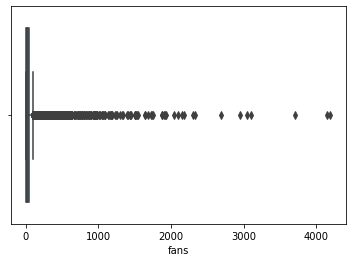

In [ ]:
# A coluna de fãs possuem muitos outliers
sns.boxplot(data=df, x='fans');

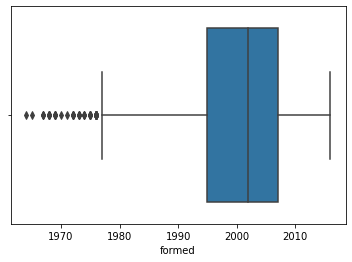

In [ ]:
# O ano de formação da banda possui alguns outliers, mas se concentra entre os anos de 1995 e 2008
sns.boxplot(data=df, x='formed');

## Análises

### Tempo de Duração das Bandas

In [ ]:
df[df['split'] == '-'].index

Int64Index([   0,    2,    4,    8,   10,   12,   18,   20,   22,   24,
            ...
            4978, 4980, 4982, 4984, 4986, 4988, 4990, 4992, 4994, 4996],
           dtype='int64', length=2183)

In [ ]:
# Para efeitos de análise, bandas cujo ano de split é igual a "-" foram considerados bandas que ainda estão juntas
df_split = df.drop(df[df['split'] == '-'].index)
df_non_split = df.drop(df[df['split'] != '-'].index)

In [ ]:
df_split.shape

(2754, 10)

In [ ]:
df_non_split.shape

(2183, 10)

Como as bandas cujo valor da coluna "split" é igual a "-" consideramos como ainda em andamento, colocaremos o ano de 2017 (pois os valores do dataset vão até 2016), para considerar o tempo que as bandas estão juntas

In [ ]:
df_non_split['split'].sample(10)

1404    -
1212    -
228     -
236     -
640     -
2986    -
1148    -
4636    -
298     -
3498    -
Name: split, dtype: object

In [ ]:
df_non_split['split'] = 2017

In [ ]:
df_non_split['split'].sample(5)

4156    2017
3582    2017
4050    2017
190     2017
2294    2017
Name: split, dtype: int64

In [ ]:
df_split['split'].sample(5)

2565    1996
4065    1999
2137    2010
2407    2004
4873    2011
Name: split, dtype: object

In [ ]:
df_split['split'] = df_split['split'].astype('int64')
df_split['formed'] = df_split['formed'].astype('int64')

In [ ]:
df_split['band_duration'] = df_split['split'] - df_split['formed']

In [ ]:
df_split.sample(10)

,band_name,fans,formed,origin,split,style,main_style,secondary_style,country,iso3,band_duration
4487,Abhorrent,1,2007,USA,2007,"Brutal death,Technical death",Brutal death,Technical death,USA,USA,0
203,Gorgoroth,498,1992,Norway,1992,Black,Black,<NA>,Norway,NOR,0
4043,Svartelder,3,2015,Norway,2015,Black,Black,<NA>,Norway,NOR,0
3621,Eight Bells,4,2010,USA,2010,Experimental progressive,Experimental progressive,<NA>,USA,USA,0
1269,Otyg,42,1995,Sweden,1995,Folk,Folk,<NA>,Sweden,SWE,0
579,Spiritual Beggars,127,1992,Sweden,1992,"Heavy,Stoner",Heavy,Stoner,Sweden,SWE,0
1907,Attacker,20,1983,USA,1983,Us power,Us power,<NA>,USA,USA,0
3797,Aenygmist,3,2007,Canada,2007,Melodic black,Melodic black,<NA>,Canada,CAN,0
1281,Darkestrah,41,1999,"Kyrgyzstan, Germany",1999,Pagan black,Pagan black,<NA>,Kyrgyzstan,KGZ,0
4543,Blastanus,1,2007,Finland,2007,"Brutal death,Grindcore",Brutal death,Grindcore,Finland,FIN,0


In [ ]:
df_non_split['band_duration'] = df_non_split['split'] - df_non_split['formed']

In [ ]:
df_non_split.sample(10)

,band_name,fans,formed,origin,split,style,main_style,secondary_style,country,iso3,band_duration
3866,Destroying Divinity,3,2001,Czech Republic,2017,Death,Death,<NA>,Czech Republic,CZE,16
1224,The Old Dead Tree,44,1997,France,2017,Gothic,Gothic,<NA>,France,FRA,20
288,Demons And Wizards,315,1999,USA,2017,"Heavy,Power",Heavy,Power,USA,USA,18
3546,Aethernaeum,4,2012,Germany,2017,"Black,Folk",Black,Folk,Germany,DEU,5
4414,Soulless,2,1997,USA,2017,"Melodic death,Thrash",Melodic death,Thrash,USA,USA,20
4528,Axial Lead,1,2011,Romania,2017,Progressive,Progressive,<NA>,Romania,ROU,6
3210,Fórn,6,2012,USA,2017,"Doom,Sludge",Doom,Sludge,USA,USA,5
4172,Chaos Magic,2,2015,Chile,2017,"Symphonic,Gothic",Symphonic,Gothic,Chile,CHL,2
3354,Bombs Of Hades,5,2002,Sweden,2017,Death,Death,<NA>,Sweden,SWE,15
356,Origin,243,1997,USA,2017,Technical death,Technical death,<NA>,USA,USA,20


#### Bandas que terminaram

In [ ]:
df_split['band_duration'].mean()

1.0777051561365287

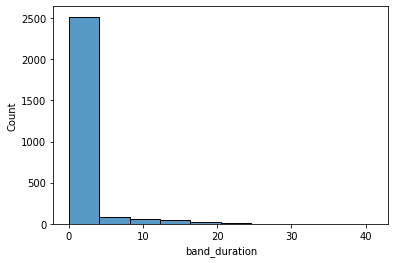

In [ ]:
sns.histplot(data=df_split, x='band_duration', bins=10);

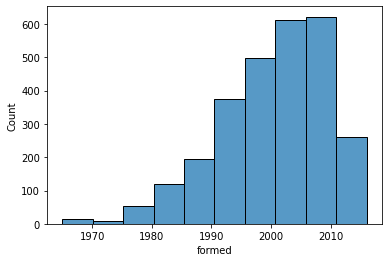

In [ ]:
sns.histplot(data=df_split, x='formed', bins=10);

In [ ]:
# bandas que se separaram agrupadas por ano
df_split_count = df_split["formed"].value_counts()
df_split_count.sum(), df_split.shape[0]

(2754, 2754)

#### Bandas que continuam na ativa

In [ ]:
df_non_split['band_duration'].mean()

16.154374713696747

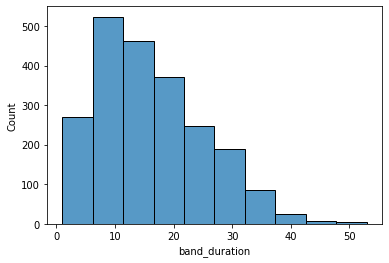

In [ ]:
sns.histplot(data=df_non_split, x='band_duration', bins=10);

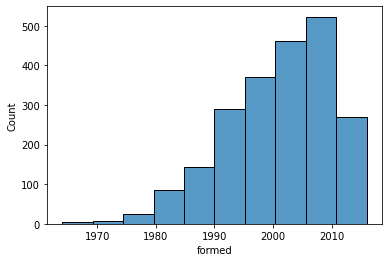

In [ ]:
sns.histplot(data=df_non_split, x='formed', bins=10);

In [ ]:
# bandas que continuam ativas agrupadas por ano
df_non_split_count = df_non_split["formed"].value_counts()
df_non_split_count.sum(), df_non_split.shape[0]

(2183, 2183)

### Número de Fãs

In [ ]:
df['formed'] = df['formed'].astype('int64')

In [ ]:
df_fans_by_year = df[['formed', 'fans']].groupby('formed').sum().reset_index().sort_values('formed', ascending=True)
df_fans_by_year.head(10)

,formed,fans
0,1964,362
1,1965,519
2,1967,183
3,1968,5456
4,1969,2811
5,1970,64
6,1971,124
7,1972,844
8,1973,985
9,1974,74


In [ ]:
df_fans_by_country = df[['country', 'fans']].groupby('country').sum().reset_index().sort_values('fans', ascending=False)
df_fans_by_country.head(10)

,country,fans
82,USA,99466
74,Sweden,47326
84,United Kingdom,34228
27,Finland,32915
30,Germany,29545
58,Norway,22480
14,Canada,8897
78,The Netherlands,8819
41,Italy,7179
28,France,7164


In [ ]:
df.corr(method='pearson')

,fans,formed
fans,1.000000,-0.267575
formed,-0.267575,1.000000


In [ ]:
df.corr(method='kendall')

,fans,formed
fans,1.000000,-0.263232
formed,-0.263232,1.000000


In [ ]:
df.corr(method='spearman')

,fans,formed
fans,1.000000,-0.373901
formed,-0.373901,1.000000


# Visualização de dados

## Relação de formação de bandas por ano

In [ ]:
df_bands_by_year = df.sort_values(by='formed', ascending=True)

In [ ]:
print(f"\nNeste dataset, foram contabilizadas bandas de {len(df_bands_by_year['formed'].unique())} anos diferentes entre os anos de {df_bands_by_year['formed'].iloc[0]} e {df_bands_by_year['formed'].iloc[-1]}.\n")


Neste dataset, foram contabilizadas bandas de 52 anos diferentes entre os anos de 1964 e 2016.



### Bandas

In [ ]:
df_bands_by_year.head()

,band_name,fans,formed,origin,split,style,main_style,secondary_style,country,iso3
256,Alice Cooper,362,1964,USA,-,"Hard rock,Glam rock,New,Wave ,Heavy",Hard rock,Glam rock,USA,USA
197,Scorpions,519,1965,Germany,1965,"Progressive rock,Hard rock,Heavy",Progressive rock,Hard rock,Germany,DEU
1669,Elf,26,1967,USA,1967,"Blues rock,Hard rock",Blues rock,Hard rock,USA,USA
609,Blue Öyster Cult,118,1967,USA,1967,Hard rock,Hard rock,<NA>,USA,USA
1314,Budgie,39,1967,United Kingdom,-,"Hard rock,Heavy,Progressive rock",Hard rock,Heavy,United Kingdom,GBR


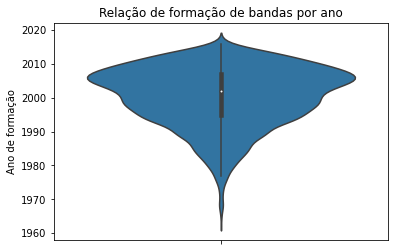

In [ ]:
violinplot_bands_formed_by_year = sns.violinplot(data=df_bands_by_year, y='formed')
violinplot_bands_formed_by_year.set(ylabel='Ano de formação')
violinplot_bands_formed_by_year.set_title("Relação de formação de bandas por ano")
plt.show()

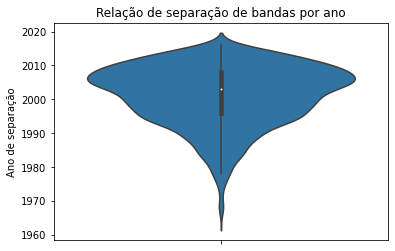

In [ ]:
violinplot_bands_by_year = sns.violinplot(data=df_split, y='split')
violinplot_bands_by_year.set(ylabel='Ano de separação')
violinplot_bands_by_year.set_title("Relação de separação de bandas por ano")
plt.show()

In [ ]:
df_non_split_count.head()

2006    124
2007    119
2005    107
2003    102
2004     98
Name: formed, dtype: int64

In [ ]:
df_active_splitted_bands = pd.DataFrame(columns=["year", "active", "splitted"])
df_active_splitted_bands["year"] = df["formed"].unique()

df_active_splitted_bands["active"] = df_active_splitted_bands["year"].map(df_non_split_count.to_dict())
df_active_splitted_bands["splitted"] = df_active_splitted_bands["year"].map(df_split_count.to_dict())
df_active_splitted_bands = df_active_splitted_bands.sort_values(by='year', ascending=True)

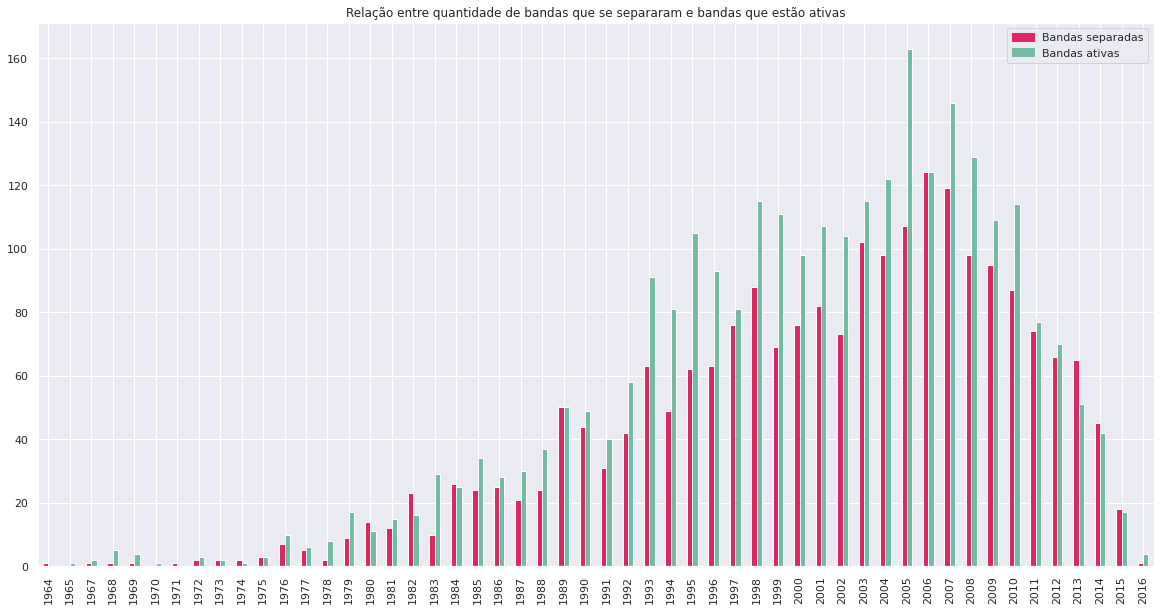

<Figure size 1440x720 with 0 Axes>

In [ ]:
ax = df_active_splitted_bands[['active', 'splitted']].plot(kind='bar', color=['#DD2763', '#74BBA4'])
ax.set_xticklabels(df_active_splitted_bands['year'], rotation=90)
plt.title('Relação entre quantidade de bandas que se separaram e bandas que estão ativas')
splitted_legend = mpatches.Patch(color='#DD2763', label='Bandas separadas')
active_legend = mpatches.Patch(color='#74BBA4', label='Bandas ativas')
plt.legend(handles=[splitted_legend, active_legend])
plt.figure(figsize=(20,10))

sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1)

### Fãs

In [ ]:
df_fans_by_year = df[['formed', 'fans']].groupby('formed').sum().reset_index().sort_values('formed', ascending=True)
df_fans_by_year

,formed,fans
0,1964,362
1,1965,519
2,1967,183
3,1968,5456
4,1969,2811
5,1970,64
6,1971,124
7,1972,844
8,1973,985
9,1974,74


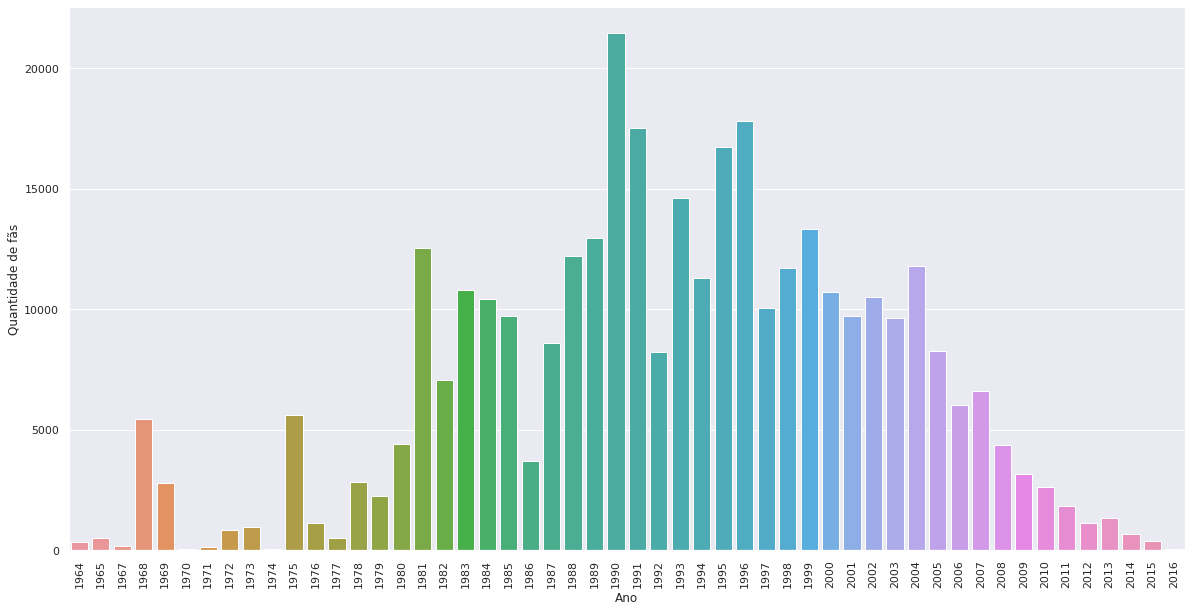

In [ ]:
barplot_fans_by_style = sns.barplot(data=df_fans_by_year, x='formed', y='fans')
barplot_fans_by_style.set(xlabel='Ano', ylabel='Quantidade de fãs')
sns.set(font_scale = 1)
plt.xticks(rotation=90)
plt.show()

### Bônus


Ao observar os gráficos podemos ver que:


1. Os períodos de **2000 até 2010**, seguido de **1990 até 2000**, foram os que mais bandas foram formadas e separadas.
2. **2005** foi o ano mais bandas formadas.
3. **2007** foi o ano com mais bandas separadas.
4. **1990, 1996, 1991 e 1995** foram os anos de formação de bandas com maior quantidade de fãs de Metal, enquanto **1967, 1970, 1974 e 2016** bandas com menor quantidade de fãs.

Para conhecer um pouco mais sobre essas bandas, selecionamos algumas nesses períodos.

In [ ]:
# Banda com maior quantidade de fãs formada período de 1990, 1996, 1991 e 1995
df_period_max_fans = df[df["formed"].isin(["1990", "1996", "1991", "1995"])]
df_period_max_fans = df_period_max_fans[df_period_max_fans['fans']==df_period_max_fans['fans'].max()].sort_values('formed', ascending=True)
df_period_max_fans.head(1)[["band_name", "fans", "formed", "main_style", "country"]]

,band_name,fans,formed,main_style,country
1,Opeth,4147,1990,Extreme progressive,Sweden


In [ ]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/bSpqLqC7U6g" frameborder="0" allowfullscreen></iframe>')

In [ ]:
# Banda com menor quantidade de fãs formada período de 1967, 1970, 1974 e 2016
df_period_min_fans = df[df["formed"].isin(["1967", "1970", "1974", "2016"])]
df_period_min_fans = df_period_min_fans[df_period_min_fans['fans']==df_period_min_fans['fans'].max()].sort_values('formed', ascending=True)
df_period_min_fans.head(1)[["band_name", "fans", "formed", "main_style", "country"]]

,band_name,fans,formed,main_style,country
609,Blue Öyster Cult,118,1967,Hard rock,USA


In [ ]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Dy4HA3vUv2c" frameborder="0" allowfullscreen></iframe>')

In [ ]:
# Banda mais antiga e ainda ativa com menor quantidade de fãs
df_min_fans = df_non_split[df_non_split['fans']==df_non_split['fans'].min()].sort_values('formed', ascending=True)
df_min_fans.head(1)[["band_name", "fans", "formed", "main_style", "country"]]

,band_name,fans,formed,main_style,country
4992,Arrest,0,1992,Hard rock,Germany


In [ ]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/OBEQakLzlvA" frameborder="0" allowfullscreen></iframe>')

In [ ]:
# Banda mais antiga e ainda ativa com maior quantidade de fãs
df_max_fans = df_non_split[df_non_split['fans']==df_non_split['fans'].max()].sort_values('formed', ascending=True)
df_max_fans.head(1)[["band_name", "fans", "formed", "main_style", "country"]]

,band_name,fans,formed,main_style,country
0,Iron Maiden,4195,1975,New wave of british heavy,United Kingdom


In [ ]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/X4bgXH3sJ2Q" frameborder="0" allowfullscreen></iframe>')

## Relação de bandas por subgênero

In [ ]:
print(f"\nNeste dataset, existem {len(df['main_style'].unique())} principais subgêneros e {len(df['secondary_style'].dropna())} bandas que mesclam mais de um subgênero,\nassim como {', '.join(df['secondary_style'].dropna().unique()[0:5])}...\n")


Neste dataset, existem 208 principais subgêneros e 2152 bandas que mesclam mais de um subgênero,
assim como Heavy, Progressive rock, Bay area thrash, Death, Gothic...



### Bandas

In [ ]:
pure = {}
mixed = {}
style_df = pd.DataFrame(columns=['Style', 'Pure', 'Mixed'])
for index, band in df.iterrows():
    main_style = band['main_style']
    secondary_style = band['secondary_style']
    if (pd.isna(secondary_style)):
        pure[main_style] = pure.get(main_style, 0) + 1
    else:
        mixed[secondary_style] = mixed.get(secondary_style, 0) + 1


style_df['Style']= mixed.keys()
style_df['Mixed']= style_df['Style'].map(mixed)
style_df['Pure'] = style_df['Style'].map(pure)

style_df = style_df.sort_values(by='Mixed', ascending=False)[:50]

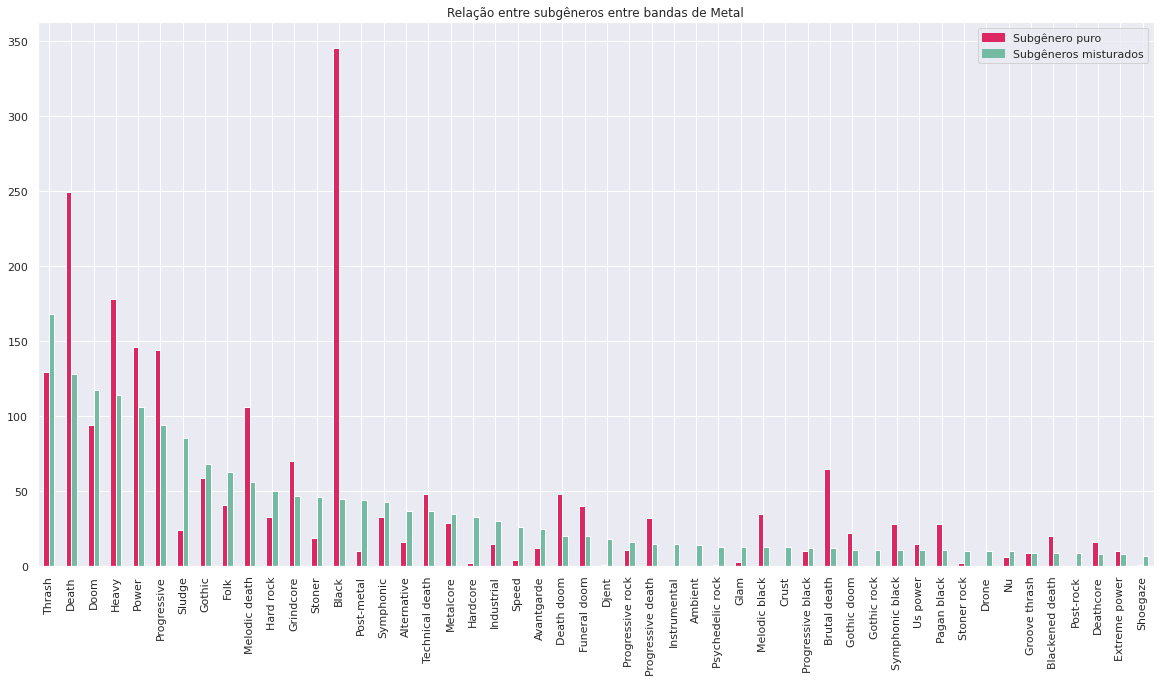

<Figure size 1440x720 with 0 Axes>

In [ ]:
ax = style_df[['Pure', 'Mixed']].plot(kind='bar', color=['#DD2763', '#74BBA4'])
ax.set_xticklabels(style_df['Style'], rotation=90)
plt.title('Relação entre subgêneros entre bandas de Metal')
mixed_legend = mpatches.Patch(color='#DD2763', label='Subgênero puro')
pure_legend = mpatches.Patch(color='#74BBA4', label='Subgêneros misturados')
plt.legend(handles=[mixed_legend, pure_legend])
plt.figure(figsize=(20,10))

sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1)

### Fãs

In [ ]:
top_styles = df[['main_style', 'fans']].groupby('main_style').sum().reset_index().sort_values('fans', ascending=False)
top_styles

,main_style,fans
103,Heavy,28563
47,Death,27299
24,Black,20750
123,Melodic death,16999
151,Power,16167
...,...,...
7,Atmospheric,1
137,Neoclassical symphonic,1
171,Psychedelic death,1
141,Noise,1


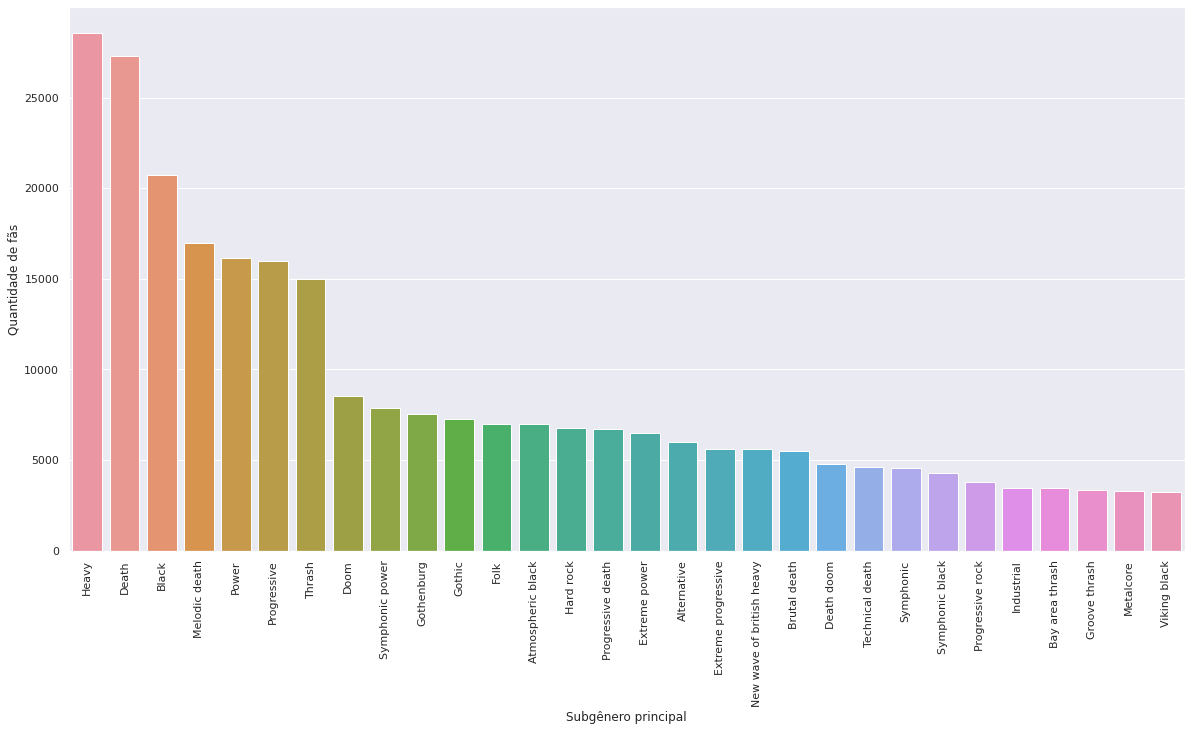

In [ ]:
barplot_fans_by_style = sns.barplot(data=top_styles[:30], x='main_style', y='fans')
barplot_fans_by_style.set(xlabel='Subgênero principal', ylabel='Quantidade de fãs')
sns.set(font_scale = 1)
plt.xticks(rotation=90)
plt.show()

### Bônus

Como foi visto nos gráficos acima, os subgêneros com mais bandas e fãs foram os de "Heavy", "Death" e "Black".

In [ ]:
df_sorted_by_fans = df.sort_values('fans', ascending=False)[["band_name", "main_style", "fans"]]
df_sorted_by_fans[df_sorted_by_fans["main_style"].isin(["Heavy", "Death", "Black"])].head(10)

,band_name,main_style,fans
2,Metallica,Heavy,3712
11,Judas Priest,Heavy,2094
14,Pantera,Heavy,1920
20,Behemoth,Death,1721
25,Amorphis,Death,1528
31,Immortal,Death,1436
33,Iced Earth,Heavy,1403
44,Therion,Death,1167
45,Cannibal Corpse,Death,1162
47,Emperor,Black,1132


Selecionamos algumas bandas desses gêneros que possuem as maiores quantidades de fãs.

**Metallica** (Heavy)



In [ ]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/tAGnKpE4NCI" frameborder="0" allowfullscreen></iframe>')

**Behemoth** (Death)

In [ ]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/UA_j_72psoo" frameborder="0" allowfullscreen></iframe>')

**Emperor** (Black)

In [ ]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/YgQRRI9goFg" frameborder="0" allowfullscreen></iframe>')

## Relação de bandas por país de origem

In [ ]:
print(f"\nNeste dataset, existem {len(df['country'].unique())} países produzindo Metal, assim como {', '.join(df['country'].unique()[0:5])}... \n")


Neste dataset, existem 86 países produzindo Metal, assim como United Kingdom, Sweden, USA, Finland, Germany... 



### TOP #10

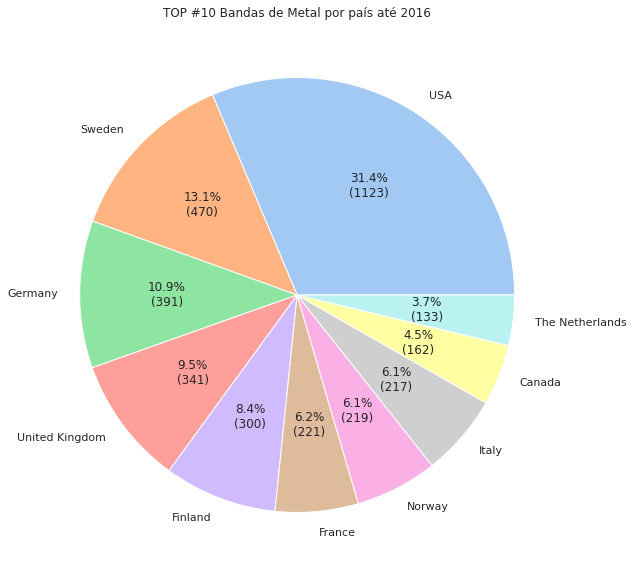

In [ ]:
country_top20 = df["country"].value_counts()[:10]

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig = plt.figure(figsize =(20, 10))
plt.title('TOP #10 Bandas de Metal por país até 2016')
colors = sns.color_palette('pastel')
plt.pie(country_top20.values,
        labels = country_top20.keys(),
        colors = colors,
        autopct = lambda pct: func(pct, country_top20.values))

plt.show()

### Escala de 1 milhão de pessoas 🌽🤘

In [ ]:
# Exemplo referência: https://ramiro.org/notebook/metal-bands-map/
band_countries = df.iso3.value_counts()
band_countries.name = "bands"
band_countries

USA    1124
SWE     470
DEU     392
GBR     342
FIN     301
       ... 
BOL       1
KGZ       1
ECU       1
TUN       1
ALB       1
Name: bands, Length: 86, dtype: Int64

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).to_crs('+proj=robin')
world = world[world.name != 'Antarctica'] # removendo antártica
world = world.join(band_countries, on='iso_a3')

# soma a contagem de bandas por país e bandas por 1 milhão de pessoas
world['band_ratio'] = world['bands'] / world['pop_est'] * 1_000_000
world.sort_values('band_ratio', ascending=False).head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,bands,band_ratio
144,339747,Europe,Iceland,ISL,16150.0,"POLYGON ((-1025302.197 6952546.772, -1048898.3...",25,73.584167
151,5491218,Europe,Finland,FIN,224137.0,"POLYGON ((1962483.961 7191405.690, 1968166.420...",301,54.814797
110,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((840937.999 6223578.056, 869899.710 6...",470,47.186448
22,57713,North America,Greenland,GRL,2173.0,"POLYGON ((-2627201.180 8280938.168, -2414731.2...",1,17.327119
142,5605948,Europe,Denmark,DNK,264800.0,"MULTIPOLYGON (((782831.650 5836658.459, 733278...",70,12.486737


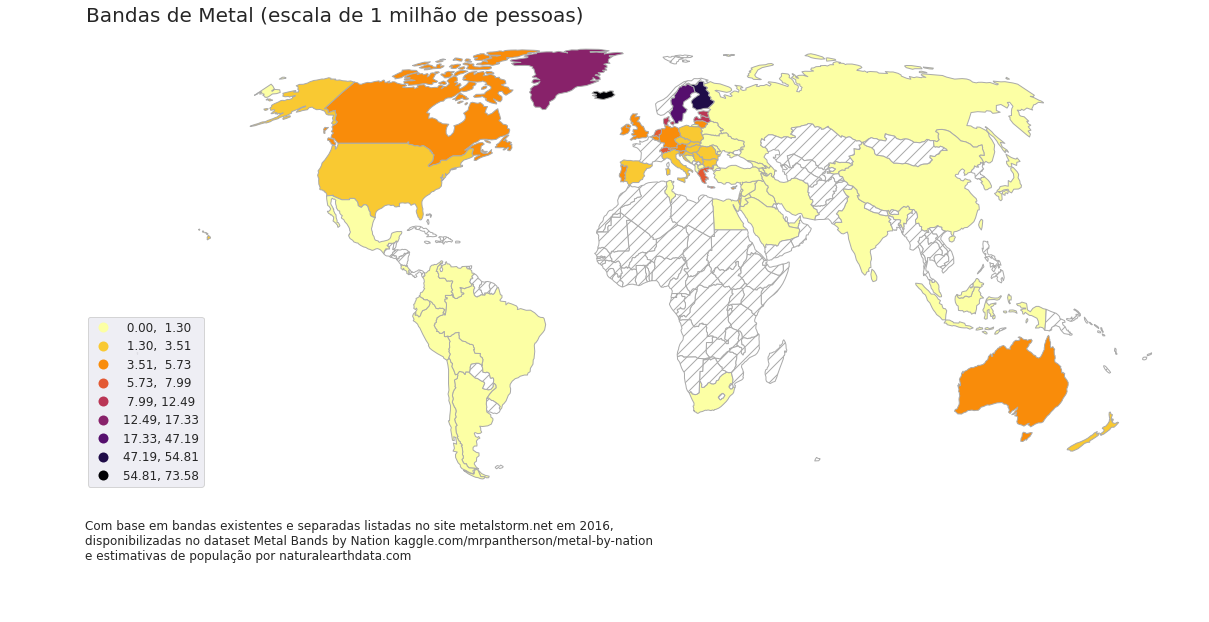

In [ ]:
paises_com_bandas = world.dropna(subset=['band_ratio'])
paises_sem_bandas = world[world['band_ratio'].isna()]

ax = paises_com_bandas.plot(column='band_ratio', cmap='inferno_r', figsize=(20, 12), scheme='fisher_jenks', k=9, legend=True, edgecolor='#aaaaaa')
paises_sem_bandas.plot(ax=ax, color='#ffffff', hatch='//', edgecolor='#aaaaaa')

ax.set_title('Bandas de Metal (escala de 1 milhão de pessoas)', fontdict={'fontsize': 20}, loc='left')
description = '''
Com base em bandas existentes e separadas listadas no site metalstorm.net em 2016,\ndisponibilizadas no dataset Metal Bands by Nation kaggle.com/mrpantherson/metal-by-nation\ne estimativas de população por naturalearthdata.com'''.strip()
ax.annotate(description, xy=(0.07, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
legend = ax.get_legend()
legend.set_bbox_to_anchor((.11, .4))
legend.prop.set_size(12)

### Relação por fãs por país de origem

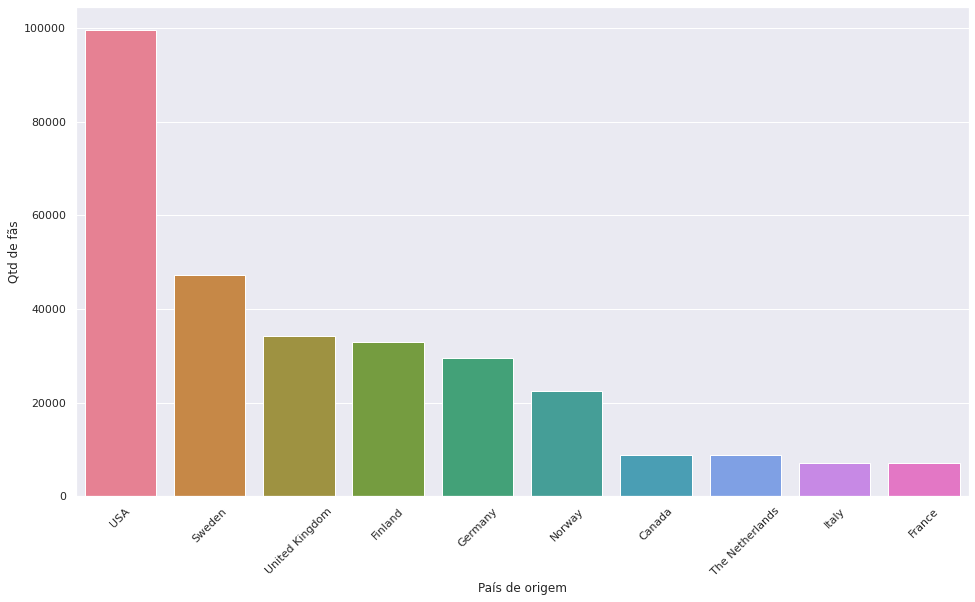

In [ ]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=45)
barplot = sns.barplot(data=df_fans_by_country.head(10), x='country', y='fans', palette="husl")
barplot.set(xlabel='País de origem', ylabel='Qtd de fãs')
plt.show()

### Bônus

Os gráficos que relacionam bandas e fãs à países mostram que o país que possui mais bandas e fãs é os Estados Unidos.

In [ ]:
df_sorted_by_fans = df.sort_values('fans', ascending=False)[["band_name", "main_style", "fans", "country"]]
df_sorted_by_fans[df_sorted_by_fans["country"] == "USA"].head(5)

,band_name,main_style,fans,country
2,Metallica,Heavy,3712,USA
3,Megadeth,Thrash,3105,USA
5,Slayer,Thrash,2955,USA
6,Death,Progressive death,2690,USA
7,Dream Theater,Progressive,2329,USA


"Metallica" é a banda estadunidense com mais fãs, seguida da "Megadeth".

In [ ]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/9d4ui9q7eDM" frameborder="0" allowfullscreen></iframe>')

## Normalização	e	discretização

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
rs = RobustScaler()
mms = MinMaxScaler()

# reescalando o ano de formação das bandas com MinMaxScaler, e a coluna de número de fãs com RobustScaler, pois possui muitos outliers 
df['formed_normalizado'] = mms.fit_transform(df[['formed']].values)

df['fans_normalizado'] = rs.fit_transform(df[['fans']].values)

In [ ]:
df.head()

,band_name,fans,formed,origin,split,style,main_style,secondary_style,country,iso3,formed_normalizado,fans_normalizado
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy",New wave of british heavy,Heavy,United Kingdom,GBR,0.211538,113.081081
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive",Extreme progressive,Progressive rock,Sweden,SWE,0.500000,111.783784
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash",Heavy,Bay area thrash,USA,USA,0.326923,100.027027
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock",Thrash,Heavy,USA,USA,0.365385,83.621622
4,Amon Amarth,3054,1988,Sweden,-,Melodic death,Melodic death,<NA>,Sweden,SWE,0.461538,82.243243


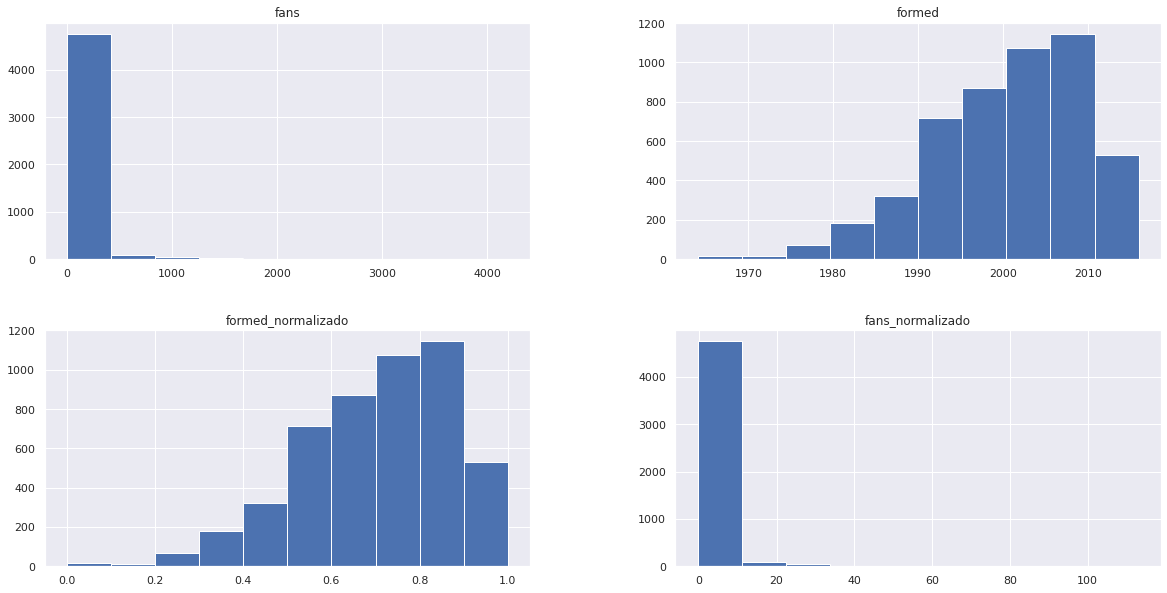

In [ ]:
df.hist();

In [ ]:
# Estatísticas Descritivas com as colunas com tipo certo:
df.describe()

,fans,formed,formed_normalizado,fans_normalizado
count,4937.000000,4937.000000,4937.000000,4937.000000
mean,70.451286,2000.512457,0.702163,1.606792
std,229.119959,8.819819,0.169612,6.192431
min,0.000000,1964.000000,0.000000,-0.297297
25%,4.000000,1995.000000,0.596154,-0.189189
50%,11.000000,2002.000000,0.730769,0.000000
75%,41.000000,2007.000000,0.826923,0.810811
max,4195.000000,2016.000000,1.000000,113.081081


In [ ]:
df.describe(exclude=('int64', 'float64'))

,band_name,origin,split,style,main_style,secondary_style,country,iso3
count,4937,4937,4937,4937,4937,2152,4937,4937
unique,4937,113,50,1226,208,194,86,86
top,This Gift Is A Curse,USA,-,Black,Black,Thrash,USA,USA
freq,1,1122,2183,345,590,168,1124,1124
